#<font color='blue'>**Projeto Final: Bootcamp Data Science, Data Analytics & Machine Learning** 
###**Como Detectar Operações Fraudulentas Baseadas no Histórico de Transações?**

Esse notebook é o segundo notebook:

-Apresenta a separação dos dados em treino e teste

-Balanceamento dos dados no conjunto de treino

-Testamos 7 algoritmos de machine learning

## <font color='blue'>**Sumário**
* [Obtendo os dados](#data)
* [Conhecendo os dados](#limpeza)
* [Visualização dos dados](#visualizacao)
* [Preparando os dados para serem apresentados à Machine Learning](#balanceamento)
* [Algoritmo - Redes Neurais](#rede)
* [Algoritmo - Random Forest](#rf)
* [Algoritmo - XGBoost](#xgb)
* [Algoritmo - SVM](#svm)
* [Algoritmo - Árvore de Decisão](#tree)
* [Algoritmo - Regressão Logísitca](#rl)
* [Algoritmo - Algoritmo - Análise Discriminante Quadrática](#quadrado)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
import itertools

import warnings
warnings.filterwarnings('ignore')

# Obtendo os dados <a name="data"></a>`


In [ ]:
file_csv = '/content/creditcard.csv'

In [ ]:
df = pd.read_csv(file_csv)

# Conhecendo os dados <a name="limpeza"></a>

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Verificar dados ausentes

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.Class.nunique()

2

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [ ]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

In [ ]:
#* Explorando correlações - Class
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.duplicated().sum()

1081

In [ ]:
df[df.duplicated() & df.Class==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102442,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102443,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102444,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102445,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102446,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
141258,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,-8.099119,7.182967,-9.445943,-0.314620,-12.991466,-0.136359,-6.367524,-12.734394,-3.845130,1.007667,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1
141260,84204.0,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,7.190306,-9.424844,-0.223293,-12.875494,-0.071918,-6.299961,-12.719207,-3.740176,0.844060,2.172709,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
143334,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,-8.409665,6.309044,-8.576761,0.246747,-11.534046,-0.364265,-5.452495,-11.887570,-3.563585,0.876019,0.545698,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,6.348979,-8.681609,0.251179,-11.608002,-0.351569,-5.363566,-11.939092,-3.583603,0.897402,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1
150661,93853.0,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,-12.965481,8.688308,-17.182918,0.069577,-14.116156,0.959032,-12.375334,-18.716765,-6.522015,3.517955,0.483930,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90,1


#### Removendo linhas duplicadas

In [ ]:
df = df.drop_duplicates()

# Visualização dos dados  <a name="visualizacao"></a>

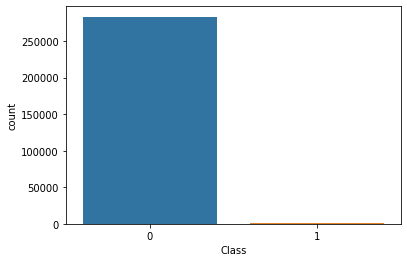

In [ ]:
sns.countplot(df.Class)

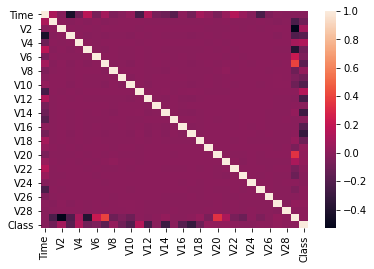

In [ ]:
sns.heatmap(df.corr())

# Preparando os dados para serem apresentados à Machine Learning <a name="balanceamento"></a>

In [ ]:
X = df.drop(['Class'], axis=1)
y=df['Class']

In [ ]:
# Separando em train e test
# stratidy garante que todas as classes serão contempladas
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.20)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Balanceamento

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE()

In [ ]:
X_sm, y_sm = smt.fit_sample(X_train, y_train)

In [ ]:
#Contagem do target depois do SMOTE
np.bincount(y_sm)

array([226602, 226602])

In [ ]:
pd.Series(y_sm).value_counts()

1    226602
0    226602
dtype: int64

## Definição de função - métricas e matriz de confusão

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Algoritmo - Redes Neurais <a name="rede"></a>

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=200, random_state=1, max_iter=300, verbose=True,learning_rate_init=0.001,early_stopping=True, n_iter_no_change=30).fit(X_sm, y_sm)

Iteration 1, loss = 0.04711660
Validation score: 0.997529
Iteration 2, loss = 0.00901299
Validation score: 0.998963
Iteration 3, loss = 0.00518342
Validation score: 0.999206
Iteration 4, loss = 0.00354830
Validation score: 0.999493
Iteration 5, loss = 0.00277773
Validation score: 0.999404
Iteration 6, loss = 0.00218518
Validation score: 0.999581
Iteration 7, loss = inf
Validation score: 0.999515
Iteration 8, loss = 0.00157893
Validation score: 0.999625
Iteration 9, loss = 0.00140954
Validation score: 0.999581
Iteration 10, loss = 0.00112672
Validation score: 0.999713
Iteration 11, loss = 0.00117824
Validation score: 0.999735
Iteration 12, loss = 0.00101342
Validation score: 0.999713
Iteration 13, loss = 0.00091801
Validation score: 0.999779
Iteration 14, loss = 0.00082383
Validation score: 0.999757
Iteration 15, loss = 0.00083207
Validation score: 0.999757
Iteration 16, loss = 0.00084857
Validation score: 0.999823
Iteration 17, loss = 0.00088776
Validation score: 0.999801
Iteration 18,

In [ ]:
y_predict = clf.predict(X_test)

## Avaliando o Modelo - Redes Neurais

              precision    recall  f1-score   support

           0    0.99958   0.99963   0.99960     56651
           1    0.77174   0.74737   0.75936        95

    accuracy                        0.99921     56746
   macro avg    0.88566   0.87350   0.87948     56746
weighted avg    0.99919   0.99921   0.99920     56746

Confusion matrix, without normalization
[[   71    24]
 [   21 56630]]


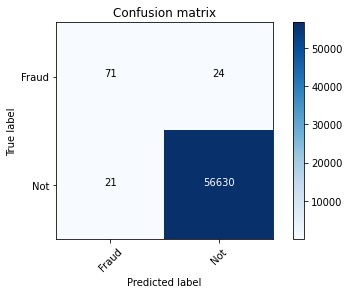

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[1, 0])
#np.set_printoptions(precision=0.001)

print (classification_report(y_test, y_predict, digits=5))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud','Not'],normalize= False,  title='Confusion matrix')

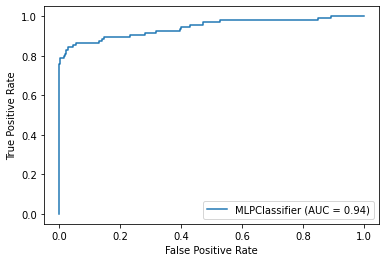

In [ ]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

In [ ]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.9428350314808398

In [ ]:
print('ROCAUC score:',roc_auc_score(y_test, y_predict))

ROCAUC score: 0.8734459093489315


## Algoritmo - Random Forest <a name="rf"></a>

In [ ]:
model_RF = RandomForestClassifier()
model_RF = model_RF.fit(X_sm, y_sm)
y_predict_sm_RF = model_RF.predict(X_test)

              precision    recall  f1-score   support

           0    0.99959   0.99982   0.99971     56651
           1    0.87805   0.75789   0.81356        95

    accuracy                        0.99942     56746
   macro avg    0.93882   0.87886   0.90663     56746
weighted avg    0.99939   0.99942   0.99940     56746

Confusion matrix, without normalization
[[   72    23]
 [   10 56641]]


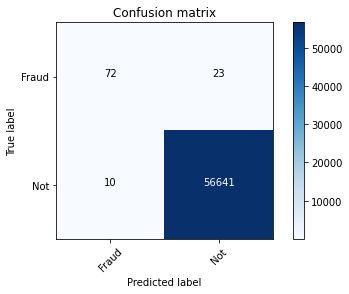

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_predict_sm_RF, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict_sm_RF, digits=5))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud','Not'],normalize= False,  title='Confusion matrix')

## Algoritmo - XGBOOST <a name="xgb"></a>

In [ ]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()

In [ ]:
model_XGB = model_XGB.fit(X_sm, y_sm)

In [ ]:
y_predict_sm_XGB = model_XGB.predict(X_test)

## Avaliando o modelo - XGBOOST

              precision    recall  f1-score   support

           0    0.99966   0.99153   0.99558     56651
           1    0.13669   0.80000   0.23349        95

    accuracy                        0.99121     56746
   macro avg    0.56818   0.89576   0.61453     56746
weighted avg    0.99822   0.99121   0.99430     56746

Confusion matrix, without normalization
[[   76    19]
 [  480 56171]]


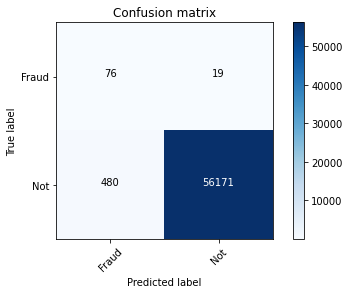

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_predict_sm_XGB, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict_sm_XGB, digits=5))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud','Not'],normalize= False,  title='Confusion matrix')

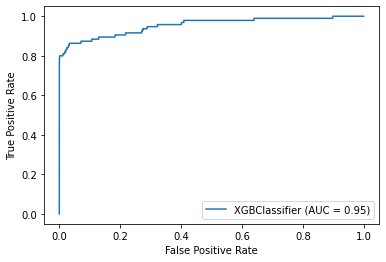

In [ ]:
plot_roc_curve(model_XGB, X_test, y_test)
plt.show()

In [ ]:
roc_auc_score(y_test, model_XGB.predict_proba(X_test)[:, 1])

0.9541275343306989

In [ ]:
print('ROCAUC score:',roc_auc_score(y_test, y_predict_sm_XGB))

ROCAUC score: 0.8957017528375493


## Algoritmo - SVM <a name="svm"></a>

In [ ]:
from sklearn import svm
clf_SVM = svm.SVC(kernel='rbf')
clf_SVM.fit(X_sm, y_sm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict_SVM = clf_SVM.predict(X_test)

## Avaliando o modelo - SVM

              precision    recall  f1-score   support

           0    0.99968   0.98685   0.99322     56651
           1    0.09367   0.81053   0.16794        95

    accuracy                        0.98655     56746
   macro avg    0.54668   0.89869   0.58058     56746
weighted avg    0.99816   0.98655   0.99184     56746

Confusion matrix, without normalization
[[   77    18]
 [  745 55906]]


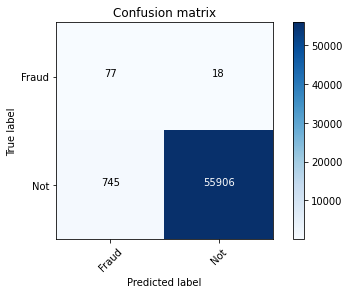

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_predict_SVM, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict_SVM, digits=5))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud','Not'],normalize= False,  title='Confusion matrix')

In [ ]:
print('ROCAUC score:',roc_auc_score(y_test, y_predict_SVM))

ROCAUC score: 0.8987937222272286


## Algoritmo - Árvore de Decisão <a name="tree"></a>

In [ ]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 300)

In [ ]:
dTree = dTree.fit(X_sm, y_sm)

In [ ]:
y_predict_Tree = dTree.predict(X_test)

## Avaliando o modelo - Árvore de Decisão

              precision    recall  f1-score   support

           0    0.99958   0.99822   0.99890     56651
           1    0.41279   0.74737   0.53184        95

    accuracy                        0.99780     56746
   macro avg    0.70618   0.87279   0.76537     56746
weighted avg    0.99859   0.99780   0.99811     56746

Confusion matrix, without normalization
[[   71    24]
 [  101 56550]]


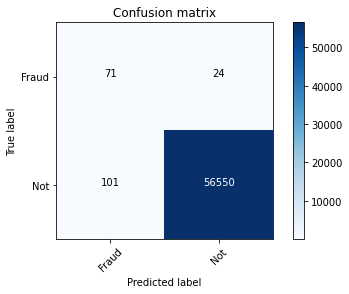

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_predict_Tree, labels=[1,0])71
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict_Tree, digits=5))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud','Not'],normalize= False,  title='Confusion matrix')

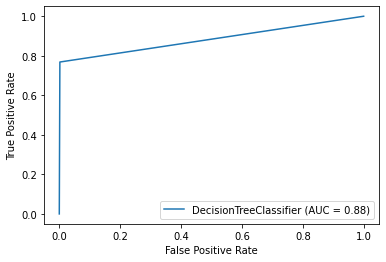

In [ ]:
plot_roc_curve(dTree, X_test, y_test)
plt.show()

In [ ]:
roc_auc_score(y_test, dTree.predict_proba(X_test)[:, 1])

0.883257321606252

In [ ]:
print('ROCAUC score:',roc_auc_score(y_test, y_predict_Tree))

ROCAUC score: 0.883257321606252


## Algoritmo - Regressão Logística <a name="rl"></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_sm, y_sm)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict_LR = LR.predict(X_test)

## Avaliando o modelo - Regressão Logística

              precision    recall  f1-score   support

           0    0.99978   0.97908   0.98932     56651
           1    0.06546   0.87368   0.12179        95

    accuracy                        0.97891     56746
   macro avg    0.53262   0.92638   0.55556     56746
weighted avg    0.99822   0.97891   0.98787     56746

Confusion matrix, without normalization
[[   83    12]
 [ 1185 55466]]


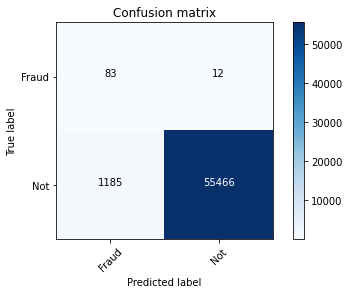

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_predict_LR, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict_LR, digits=5))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud','Not'],normalize= False,  title='Confusion matrix')

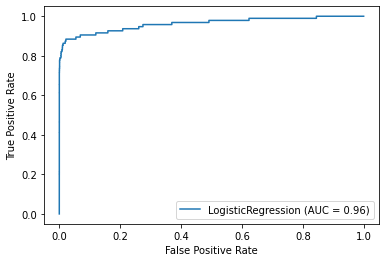

In [ ]:
plot_roc_curve(LR, X_test, y_test)
plt.show()

In [ ]:
roc_auc_score(y_test, LR.predict_proba(X_test)[:, 1])

0.9622124011375282

In [ ]:
print('ROCAUC score:',roc_auc_score(y_test, y_predict_LR))

ROCAUC score: 0.9265333728489021


In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict_LR,pos_label=0)

0.9791751230962004

## Algoritmo - Análise Discriminante Quadrática <a name="quadrado"></a>

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_sm, y_sm)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
y_predict_Q = clf.predict(X_test)

              precision    recall  f1-score   support

           0    0.99971   0.97123   0.98526     56651
           1    0.04623   0.83158   0.08758        95

    accuracy                        0.97099     56746
   macro avg    0.52297   0.90140   0.53642     56746
weighted avg    0.99811   0.97099   0.98376     56746

Confusion matrix, without normalization
[[   79    16]
 [ 1630 55021]]


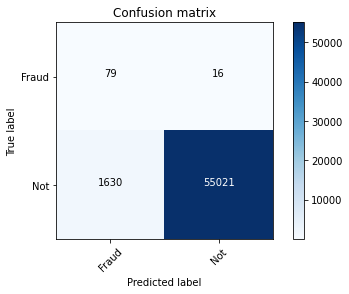

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_predict_Q, labels=[1, 0])
#np.set_printoptions(precision=0.001)

print (classification_report(y_test, y_predict_Q, digits=5))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud','Not'],normalize= False,  title='Confusion matrix')